In [17]:
import os
import pandas as pd
from scipy.cluster import hierarchy # 导入我们用于层次聚类的新工具
from sklearn.preprocessing import StandardScaler # 导入用于数据标准化的新工具
import numpy as np

folder_directory = '/Users/zhanghongyi/Desktop/25_Summer/Quant_Finance/ricequant_strategies/Factor_test/d_短期 (1-3年)_tvalue_collection'
file = collection = os.listdir(folder_directory)
list_to_tranlate = []
for file_name in file:

    path = os.path.join(folder_directory,file_name)
    t_value_df = pd.read_csv(path,index_col='date',parse_dates= True)
    file_name_1 = file_name.split('index_')[1]
    file_name_2 = file_name_1.rsplit('.',1)[0]
    t_value_df_1 = t_value_df.rename(columns={'t_value':file_name_2})
    list_to_tranlate.append(t_value_df_1)
    
final_matrix = pd.concat( list_to_tranlate,axis = 1)
final_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
print(final_matrix.info())
if final_matrix.shape[1] > 0:
    # 使用一个很小的阈值以应对浮点数精度问题
    final_matrix = final_matrix.loc[:, final_matrix.std() > 1e-8]
final_matrix.fillna(method='ffill', inplace=True)
final_matrix.fillna(0, inplace=True)
print(final_matrix.sample(50))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 722 entries, 2018-01-03 to 2020-12-22
Columns: 141 entries, 银行间短期融资券即期收益率曲线（AAA-）:6月 to volatility_20d
dtypes: float64(141)
memory usage: 801.0 KB
None
            银行间短期融资券即期收益率曲线（AAA-）:6月  社会融资规模_新增信托贷款_当月值  住宅竣工面积:累计同比:月  \
date                                                                     
2020-08-27                 -2.040044           1.553709      -1.383527   
2019-11-28                 -0.977664          -2.330309      -1.199913   
2018-12-07                 -1.971843           5.269901      -1.351243   
2018-08-14                  0.184870          -1.296830       0.747496   
2020-01-22                  1.247701           0.336482      -0.609416   
2018-03-05                  0.000000           0.000000       0.000000   
2019-01-15                 -2.308099          -1.657076       2.387176   
2018-11-19                  1.061148           2.279612      -1.649594   
2019-01-16                 -1.662992           0.006914

/var/folders/nw/qn0916dd3g12_8kqhgfzzgp40000gn/T/ipykernel_44584/2469053853.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_matrix.fillna(method='ffill', inplace=True)


computing_correlation_matrix
正在绘制热力图...


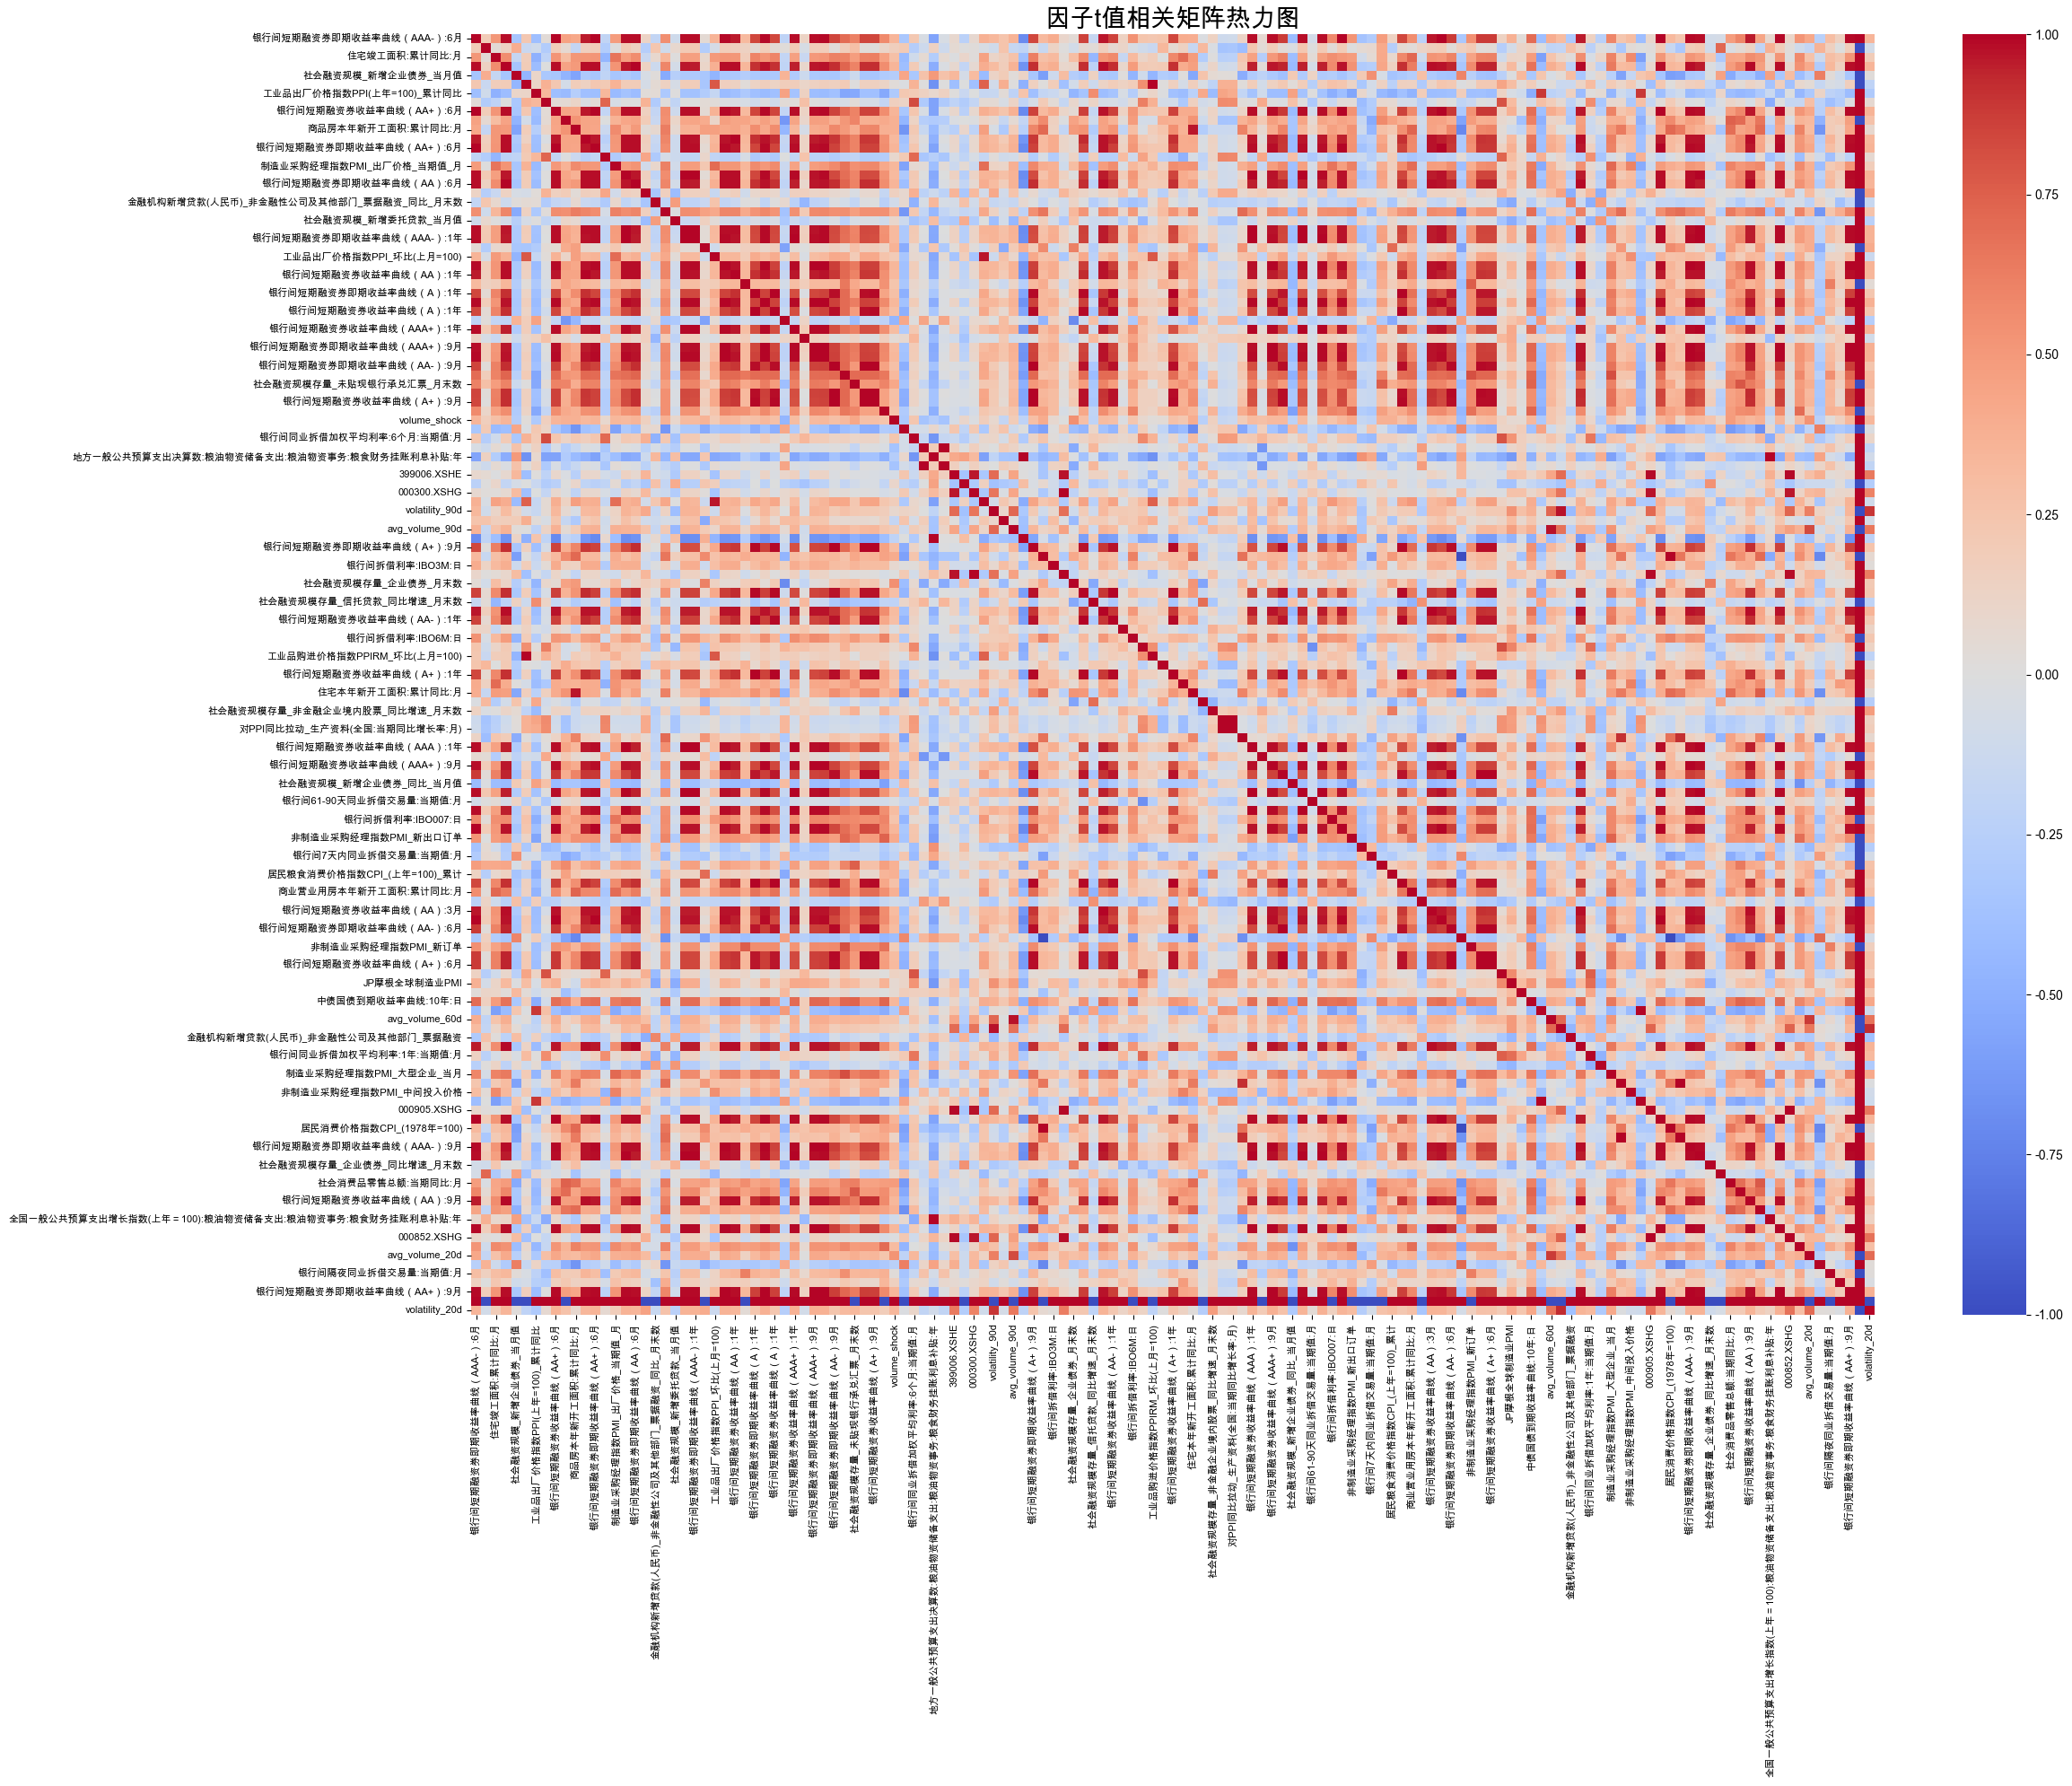

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 'SimHei' 是黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题
print('computing_correlation_matrix')
corr_matrix = overall_df.corr()
print("正在绘制热力图...")
        # 创建一个大的画布，figsize=(宽度, 高度)，单位是英寸。
        # 因为您的因子很多，所以我们需要一个足够大的图才能看清。
plt.figure(figsize=(25, 20)) 

# 调用seaborn的heatmap函数来绘图
# - corr_matrix: 我们要可视化的数据
# - cmap='coolwarm': 指定一个配色方案。'coolwarm'非常适合相关性，正相关偏红，负相关偏蓝。
# - annot=False: 是否在格子里显示数字。因为因子太多，显示数字会挤成一团，所以先设为False。
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)

# d) 添加图表标题和标签
plt.title('因子t值相关矩阵热力图', fontsize=20) # 设置一个大标题
plt.xticks(fontsize=8) # 调小x轴标签字体
plt.yticks(fontsize=8) # 调小y轴标签字体
plt.tight_layout() # 自动调整布局，防止标签重叠

# e) 显示图表
# 这行代码会弹出一个窗口，展示您绘制的图像
plt.show()



正在进行层次聚类分析...
正在绘制聚类树状图...


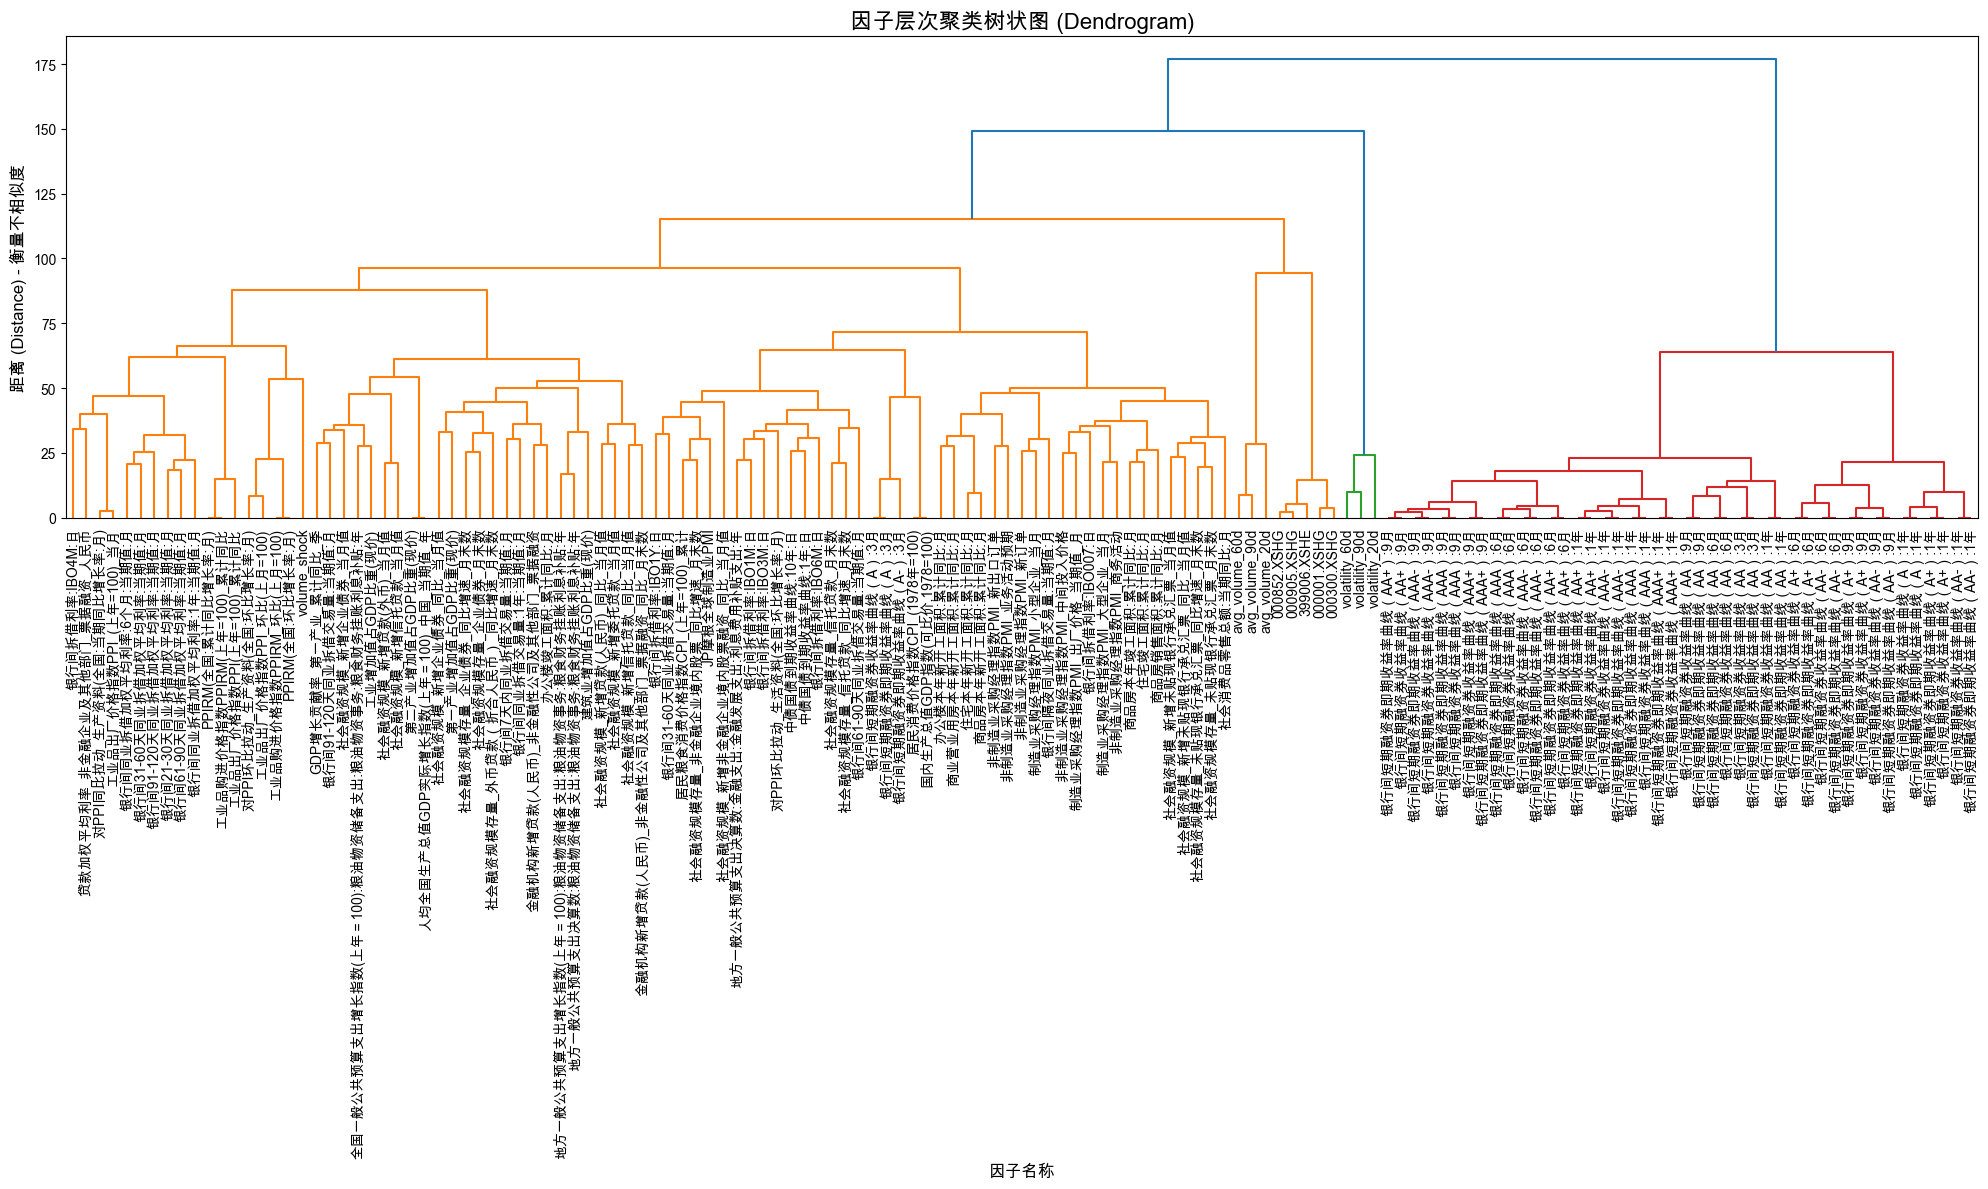


因子分类结果 (按类别排序):
                                                    因子  类别
0                             银行间短期融资券即期收益率曲线（AAA-）:6月   1
35                             银行间短期融资券即期收益率曲线（AAA）:9月   1
36                             银行间短期融资券即期收益率曲线（AA-）:9月   1
39                               银行间短期融资券收益率曲线（AA-）:9月   1
40                                银行间短期融资券收益率曲线（A+）:9月   1
56                              银行间短期融资券即期收益率曲线（A+）:9月   1
61                             银行间短期融资券即期收益率曲线（AA-）:1年   1
63                              银行间短期融资券即期收益率曲线（AA）:3月   1
64                               银行间短期融资券收益率曲线（AA-）:1年   1
78                               银行间短期融资券收益率曲线（AAA）:1年   1
80                              银行间短期融资券收益率曲线（AAA+）:9月   1
81                              银行间短期融资券即期收益率曲线（A+）:6月   1
83                             银行间短期融资券即期收益率曲线（AAA）:1年   1
85                            银行间短期融资券即期收益率曲线（AAA+）:1年   1
87                               银行间短期融资券收益率曲线（AAA）:6月   1
93                              银行间短期融资

In [26]:

print("\n正在进行层次聚类分析...")

# a) 数据准备：转置与标准化
# 聚类分析的对象是“因子”，所以我们需要将DataFrame转置，让每一行代表一个因子。
data_for_clustering = final_matrix.T

# 标准化数据，消除不同因子t值波动大小（量纲）的影响，让算法更关注“变化模式”本身。
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# b) 执行层次聚类
# 'ward' 是一种常用的连接算法(linkage method)，它的目标是最小化各个簇内的方差。
# 它会返回一个描述了因子之间如何一步步合并成簇的“关系树”结构。
linked = hierarchy.linkage(data_scaled, method='ward')

# c) 绘制树状图 (Dendrogram)
print("正在绘制聚类树状图...")
plt.figure(figsize=(20, 12))

# 调用 dendrogram 函数来可视化 'linked' 结构
hierarchy.dendrogram(
    linked,
    orientation='top', # 'top' 表示树从上往下生长，也可以设为 'left' 让它从左往右
    labels=data_for_clustering.index, # 使用因子名作为树叶的标签
    distance_sort='descending', # 按距离降序排列，让图结构更清晰
    show_leaf_counts=True, # 显示每个叶节点代表的因子数量（通常是1）
    leaf_rotation=90, # 将底部的因子标签旋转90度，防止重叠
    leaf_font_size=10 # 设置标签字体大小
)

plt.title('因子层次聚类树状图 (Dendrogram)', fontsize=16)
plt.xlabel('因子名称', fontsize=12)
plt.ylabel('距离 (Distance) - 衡量不相似度', fontsize=12)
plt.tight_layout()
plt.show()

# d) (可选) 从聚类结果中提取分组标签
# 我们可以通过设定一个“切割高度”或“目标簇数量”来获得每个因子的具体分组。
# 例如，我们想把所有因子分成5个大类：
num_clusters = 4
clusters = hierarchy.fcluster(linked, num_clusters, criterion='maxclust')

# 将结果整理成一个DataFrame，方便查看
factor_clusters = pd.DataFrame({'因子': data_for_clustering.index, '类别': clusters})
print("\n因子分类结果 (按类别排序):")
print(factor_clusters.sort_values('类别'))

output_path = 'd_clustering_result.csv'
factor_clusters.sort_values('类别').to_csv(output_path)